<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales</h1>
    <h3>Clase 6</h3>
    <h3>Ejercicio 2 - Intro LSTM</h3>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Sebastián Calcagno, Drago Braian <p>
</div>

A continuación, se plantea un ejemplo de modelización LSTM, univariado donde se pretende reconocer las características básicas que componen la estructura de este tipo de red y las transformaciones necesarias de los datos para su correcto uso.

**Keras** es una biblioteca de Redes Neuronales de Código Abierto escrita en Python. Es capaz de ejecutarse sobre TensorFlow. De hecho, Keras es una API (Interfaz de programación de aplicaciones) de alto nivel de TensorFlow para construir y entrenar modelos de aprendizaje profundo.

https://keras.io/examples/

UNIVARIATE TIME SERIES FORCASTING =
Ventas por dias


**Carga de librerías necesarias:**

In [1]:
# Ejemplo univariado LSTM
import numpy as np
from tensorflow.keras.models import Sequential # para construir modelos de redes neuronales de manera secuencial capa por capa.
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense #cada neurona está conectada a todas las neuronas de la capa anterior.
from tensorflow.keras.layers import Flatten # Su propósito es aplanar (flatten) los datos multidimensionales de entrada en una única dimensión.
from array import array

**Creamos la función que nos servirá para la transformación de datos:**

In [2]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):

	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		# ej = 110,125,133 es "x" / end_ix= 146
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

**Definimos la secuencia de datos, nuestra serie de tiempo:**

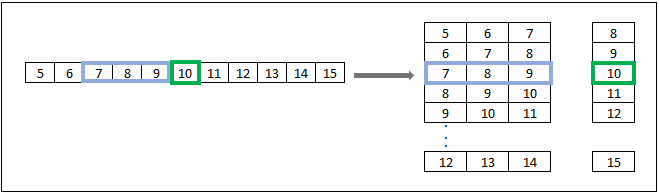

In [3]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
# preparo las variables dependientes e independientes.
X, y = prepare_data(timeseries_data, n_steps)

In [4]:
print(X)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]


In [5]:
print(y)

[146 158 172 187 196 210]


In [6]:
X.shape

(6, 3)

 **Ahora debemos estructurar los datos en lotes (batches) y en tensores 3D con la forma (número de muestras, pasos de tiempo, características) necesaria para aplicar LSTM:**

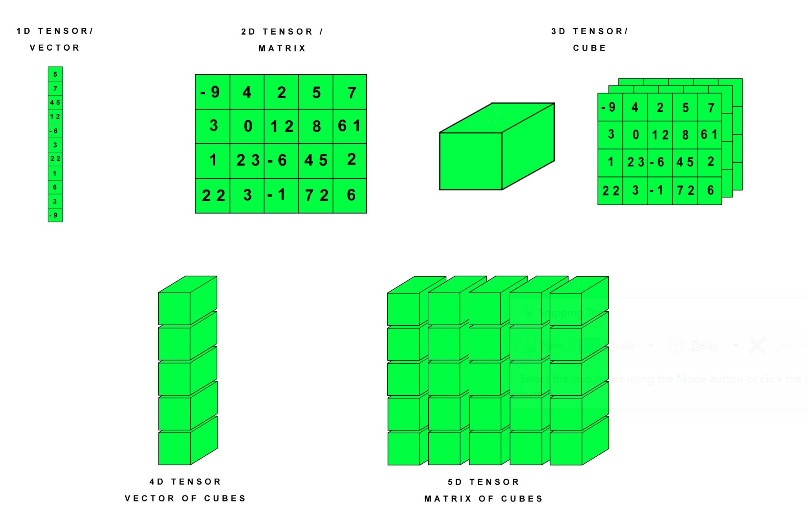

El propósito de esta línea de código es reorganizar las dimensiones de X para que sea compatible con la entrada esperada por una red LSTM. Las redes LSTM en Keras (o TensorFlow) esperan un tensor tridimensional con las siguientes dimensiones:  

Dimensión 1: Número de muestras.  
Dimensión 2: Longitud de cada secuencia (pasos de tiempo).  
Dimensión 3: Número de características (features) en cada paso de tiempo.  

In [7]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1  # para convertir X en una variable de 3 dimensiones.Este valor indica el número de características en la entrada,
X = X.reshape((X.shape[0], X.shape[1], n_features))


In [8]:
X

array([[[110],
        [125],
        [133]],

       [[125],
        [133],
        [146]],

       [[133],
        [146],
        [158]],

       [[146],
        [158],
        [172]],

       [[158],
        [172],
        [187]],

       [[172],
        [187],
        [196]]])

In [9]:
X.shape

(6, 3, 1)

Construimos el modelo LSTM

[Parametros del optimizador](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)

In [10]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))     # return_sequences=True, input_shape=(n_steps, n_features)))
# model.add(LSTM(50, activation='relu')) - Rectified Linear Unit (o unidad lineal rectificada)
model.add(Dense(1))  # output node
model.compile(optimizer='Nadam', loss='mse') #Indica el algoritmo de descenso de gradiente que vamos a usar junto con la tasa de aprendizaje o learning_rate

# fit model
model.fit(X, y, epochs=50, verbose=1) # Epoch. Este es el numero de veces que se ejecutaran los algoritmos

Epoch 1/50


1/1 [==============================] - 2s 2s/step - loss: 25164.1094
Epoch 2/50
1/1 [==============================] - 0s 6ms/step - loss: 24666.5000
Epoch 3/50
1/1 [==============================] - 0s 5ms/step - loss: 24326.1406
Epoch 4/50
1/1 [==============================] - 0s 6ms/step - loss: 23957.2188
Epoch 5/50
1/1 [==============================] - 0s 5ms/step - loss: 23542.5098
Epoch 6/50
1/1 [==============================] - 0s 6ms/step - loss: 23058.9375
Epoch 7/50
1/1 [==============================] - 0s 5ms/step - loss: 22463.7754
Epoch 8/50
1/1 [==============================] - 0s 7ms/step - loss: 21680.6699
Epoch 9/50
1/1 [==============================] - 0s 7ms/step - loss: 20576.0820
Epoch 10/50
1/1 [==============================] - 0s 5ms/step - loss: 18959.7012
Epoch 11/50
1/1 [==============================] - 0s 5ms/step - loss: 16770.4355
Epoch 12/50
1/1 [==============================] - 0s 5ms/step - loss: 14402.7852
Epoch 13/50
1/1 [====================

**Predicción: Queremos predecir para un horizonte temporal de 10 días:**

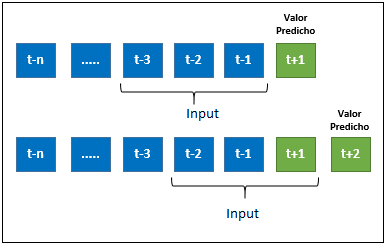

In [11]:
# Output para un horizonte temporal de 10 dias

import numpy as np

x_input = np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):

    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1


print(lst_output)

[229.15428]
1 day input [196.         210.         229.15428162]
1 day output [[244.62897]]
2 day input [210.         229.15428162 244.62896729]
2 day output [[262.76733]]
3 day input [229.15428 244.62897 262.76733]
3 day output [[283.78287]]
4 day input [244.62897 262.76733 283.78287]
4 day output [[304.58798]]
5 day input [262.76733 283.78287 304.58798]
5 day output [[327.51395]]
6 day input [283.78287 304.58798 327.51395]
6 day output [[352.63885]]
7 day input [304.58798 327.51395 352.63885]
7 day output [[379.10175]]
8 day input [327.51395 352.63885 379.10175]
8 day output [[407.7729]]
9 day input [352.63885 379.10175 407.7729 ]
9 day output [[438.71]]
[229.15428, 244.62897, 262.76733, 283.78287, 304.58798, 327.51395, 352.63885, 379.10175, 407.7729, 438.71]


In [12]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [13]:
len(timeseries_data)

9

**Vizualizamos el output**

In [14]:
import matplotlib.pyplot as plt


In [15]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

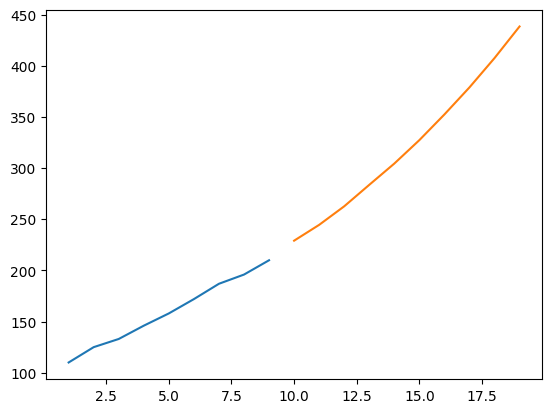

In [16]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)